In [2]:
# Instalar a biblioteca SKFUZZY com o comando no prompt: pip install -U scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definição das variáveis linguisticas de ENTRADA e de SAÍDA
comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')
preco = ctrl.Antecedent(np.arange(0, 11, 1), 'preco')
avaliacao = ctrl.Consequent(np.arange(0, 11, 1), 'avaliacao')

c:\Users\rafin\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


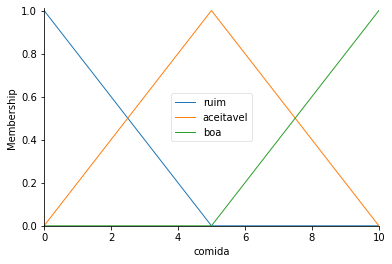

In [3]:
# Definição do número de Conjuntos Difusos em: (3, 5, or 7) por meio do Método automf(N) ou na forma customizada
comida['ruim'] = fuzz.trimf(comida.universe,[0, 0, 5])
comida['aceitavel'] = fuzz.trimf(comida.universe,[0, 5, 10])
comida['boa'] = fuzz.trimf(comida.universe,[5, 10, 10])

comida.view()

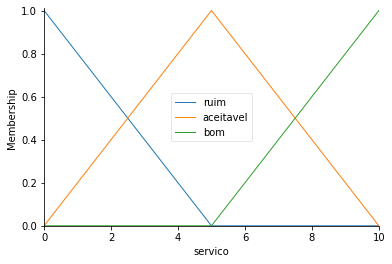

In [4]:
servico['ruim'] = fuzz.trimf(servico.universe, [0, 0, 5])
servico['aceitavel'] = fuzz.trimf(servico.universe, [0, 5, 10])
servico['bom'] = fuzz.trimf(servico.universe, [5, 10, 10])

servico.view()

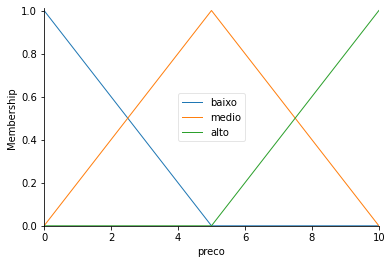

In [6]:
preco['baixo'] = fuzz.trimf(preco.universe, [0, 0, 5])
preco['medio'] = fuzz.trimf(preco.universe, [0, 5, 10])
preco['alto'] = fuzz.trimf(preco.universe, [5, 10, 10])

preco.view()

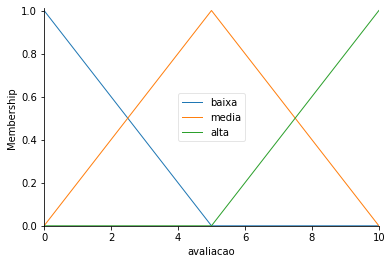

In [7]:
# Parametriza os Conjuntos Difusos da variável de Saída
avaliacao['baixa'] = fuzz.trimf(avaliacao.universe, [0, 0, 5])
avaliacao['media'] = fuzz.trimf(avaliacao.universe, [0, 5, 10])
avaliacao['alta'] = fuzz.trimf(avaliacao.universe, [5, 10, 10])

avaliacao.view()

In [8]:
# Definição das Regras (Heurística Usada no processo de Raciocínio Fuzzy). Compõe a base de Conhecimento do Sistema
r1 = ctrl.Rule(comida['ruim'] | servico['ruim'] & preco['alto'], avaliacao['baixa'])
r2 = ctrl.Rule(comida['ruim'] & servico['aceitavel'] & preco['alto'], avaliacao['baixa'])
r3 = ctrl.Rule(comida['ruim'] & servico['bom'] & preco['alto'], avaliacao['baixa'])

r4 = ctrl.Rule(comida['aceitavel'] | servico['ruim'] & preco['medio'], avaliacao['baixa'])
r5 = ctrl.Rule(comida['aceitavel'] & servico['aceitavel'] & preco['medio'], avaliacao['media'])
r6 = ctrl.Rule(comida['aceitavel'] | servico['bom'] & preco['medio'], avaliacao['alta'])

r7 = ctrl.Rule(comida['boa'] | servico['ruim'] & preco['baixo'], avaliacao['baixa'])
r8 = ctrl.Rule(comida['boa'] & servico['aceitavel'] & preco['baixo'], avaliacao['media'])
r9 = ctrl.Rule(comida['boa'] | servico['bom'] & preco['baixo'], avaliacao['alta'])

In [9]:
# Processo de Inferência: 
# (1) fuzzyficação das entradas; 
# (2) Ativação das regras com concordância u(x) > 0;
# (3) - Agregação/Composição da Saída; 
# (4) - Desfuzzificação

criterios = ctrl.ControlSystem([r1, r2, r3, r4, r5, r6, r7, r8, r9])
resultado = ctrl.ControlSystemSimulation(criterios)


comida_ = int(input('Qual a nota da comida? '))
servico_ = int(input('Qual a nota do serviço? '))
preco_ = int(input('Qual a nota do preço? '))

resultado.input['comida'] = comida_
resultado.input['servico'] = servico_
resultado.input['preco'] = preco_

resultado.compute()

Valor de saída desfuzzificado =  5.0


c:\Users\rafin\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


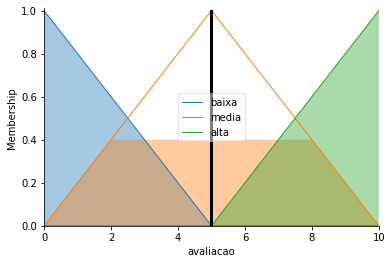

In [10]:
print("Valor de saída desfuzzificado = ",resultado.output['avaliacao'])
y = resultado.output['avaliacao']
#print("sugerindo uma avaliacao de %2.2f %%" % y)
avaliacao.view(sim=resultado)
